## Genaralization

In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np

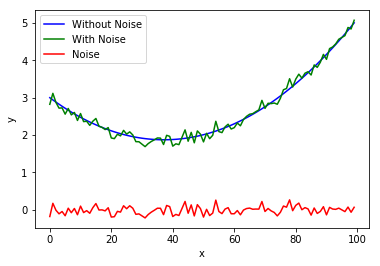

In [2]:
#Generate a toy dataset
x = np.linspace(-1,1,100)
signal = 2 + x + 2 * x * x
noise = np.random.normal(0, 0.1, 100)
y = signal + noise
plt.plot(signal,'b'); 
plt.plot(y,'g')
plt.plot(noise, 'r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Without Noise", "With Noise", "Noise"], loc = 2)
plt.show()


In [3]:
#Extract training from the toy dataset
x_train = x[0:80]
y_train = y[0:80]
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)


Shape of x_train: (80,)
Shape of y_train: (80,)


In [4]:
#Create a function to build a regression model with parameterized degree of independent coefficients
def create_model(x_train,degree):    
    degree+=1
    X_train = np.column_stack([np.power(x_train,i) for i in range(0,degree)])
    model = np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(),X_train)),X_train.transpose()),y_train)
    plt.plot(x,y,'g')
    plt.xlabel("x")
    plt.ylabel("y")
    predicted = np.dot(model, [np.power(x,i) for i in range(0,degree)]) 
    plt.plot(x, predicted,'r')
    plt.legend(["Actual", "Predicted"], loc = 2)
    plt.title("Model with degree =3")
    train_rmse1 = np.sqrt(np.sum(np.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80])))
    test_rmse1 = np.sqrt(np.sum(np.dot(y[80:] - predicted[80:], y[80:] - predicted[80:])))
    print("Train RMSE(Degree = "+str(degree)+"):", round(train_rmse1,2))
    print("Test RMSE (Degree = "+str(degree)+"):", round(test_rmse1,2))
    plt.show()	



Train RMSE(Degree = 2): 3.72
Test RMSE (Degree = 2): 7.57


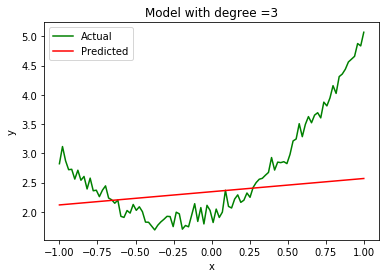

In [5]:
#Create a model with degree = 1 using the function
create_model(x_train,1)


Train RMSE(Degree = 3): 0.98
Test RMSE (Degree = 3): 0.45


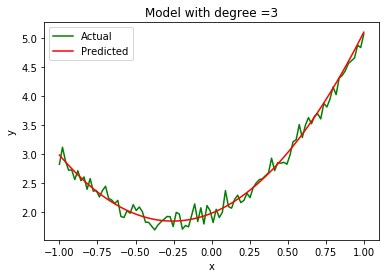

In [6]:
#Create a model with degree=2
create_model(x_train,2)

Train RMSE(Degree = 9): 0.97
Test RMSE (Degree = 9): 32.74


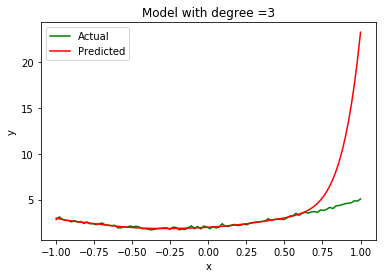

In [7]:
#Create a model with degree=8
create_model(x_train,8)


## Regularization

In [8]:
#Listing 1-5. Regularization
import matplotlib.pyplot as plt
import numpy as np

#Setting seed for reproducibility
np.random.seed(20)

#Create random data
x = np.linspace(-1,1,100)
signal = 2 + x + 2 * x * x
noise = np.random.normal(0, 0.1, 100)
y = signal + noise
x_train = x[0:80]
y_train = y[0:80]

train_rmse = []
test_rmse = []
degree = 80



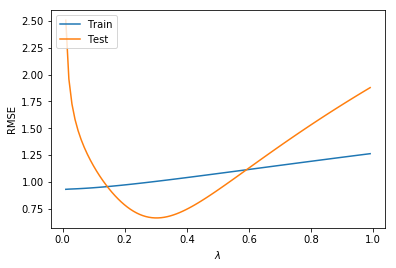

In [9]:
#Define a range of values for lambda
lambda_reg_values = np.linspace(0.01,0.99,100)

#For each value of lambda, compute build model and compute performance
for lambda_reg in lambda_reg_values:
    X_train = np.column_stack([np.power(x_train,i) for i in range(0,degree)])
    model = np.dot(np.dot(np.linalg.inv(np.dot(X_train.transpose(),X_train) + lambda_reg * np.identity(degree)),X_train.transpose()),y_train)
    predicted = np.dot(model, [np.power(x,i) for i in range(0,degree)])
    train_rmse.append(np.sqrt(np.sum(np.dot(y[0:80] - predicted[0:80], y_train - predicted[0:80]))))
    test_rmse.append(np.sqrt(np.sum(np.dot(y[80:] - predicted[80:], y[80:] - predicted[80:]))))

#Plot the performance over train and test dataset.
plt.plot(lambda_reg_values, train_rmse)
plt.plot(lambda_reg_values, test_rmse)
plt.xlabel(r"$\lambda$")
plt.ylabel("RMSE")
plt.legend(["Train", "Test"], loc = 2)
plt.show()

